# **ANALYSIS: 1000 DATA SCIENCE BOOKS ON AMAZON**

Before embarking on my journey to  the full time residential AI-ML post graduate course that will commence in August 2023, i decided to take a data-driven approach to explore a little bit about what kind of data science books are available out there. So i found a data set on kaggle that contained data on nearly 1000 data science books on Amazon, including the ratings, the price, the number of pages and other characteristics.

In this project i will be doing two levels of analysis-what i would call basic and intermediate.

On level 1, i will do some simple exploratory data analysis to answer questions like do more expensive books have better reviews? is it always true that longer books are more expensive? What are the best python related books and what are the best machine learning books based on review stars?

Moving on to level 2, i start getting a bit more fancy. i want to find out what are the main types or main categories of data science books out there based on the book titles. I will be using k-means for clustering the book titles and in order to do that for text data, i use an NLP technique called TFIDF or term frequency inverse document frequency to convert the text into numeric features.


**DATASET**
https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books

The dataset contains 946 books obtained from scraping Amazon books related to data science, statistics, data analysis, Python, deep learning, and machine learning.
There are 18 columns:

title: title of the book

author: author (or the authors) of the book

price: price (in dollars)

price (including used books): price range of new and used books (in dollars)

pages: number of pages

avg_reviews: average reviews (out of 5)

n_reviews: reviews done for each book

star5: percentage of 5 star reviews

star4: percentage of 4 star reviews

star3: percentage of 3 star reviews

star2: percentage of 2 star reviews

star1: percentage of 1 star reviews

dimensions: size of the book (in inches)

weight: weight (in pounds or ounces)

language: language of the book

publisher: publisher

ISBN-13: ISBN_13 code

link: link of the Amazon book

complete_link: complete link of the Amazon book (including the domain https://amazon.com)

In [ ]:
# way to import csv file from google drive to colab
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Colab Notebooks/final_book_dataset_kaggle2.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
data = pd.read_csv(path)
data.head()

**EXPLORATORY DATA ANALYSIS ON DS BOOKS**

To answer a question like do more expensive books tend to have better reviews, i created a scatter plot that plots the book price against the average reviews in this case I'm using plotly Express to quickly create the scatter plot with the x-axis being the price, the y-axis being the average reviews and maybe you can also add the size as the number of reviews just to see how popular a book is.

**PRICE VS. REVIEWS**

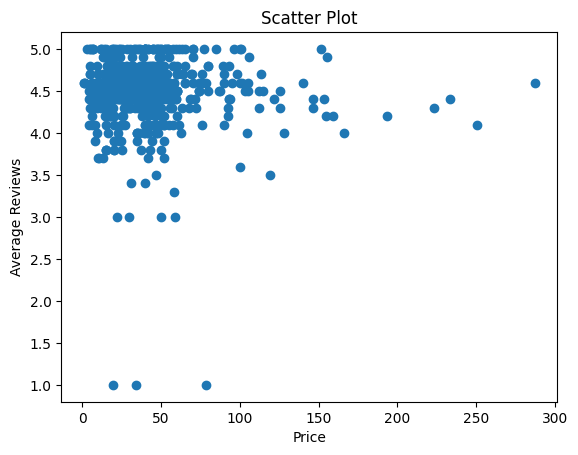

In [27]:
# Use the appropriate columns from the DataFrame
price = data['price']
avg_reviews = data['avg_reviews']
n_reviews = data['n_reviews']

# Create scatter plot
plt.scatter(price, avg_reviews)

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Average Reviews')
plt.title('Scatter Plot')

# Display the plot
plt.show()

You can see that there's actually no clear relationship between the price and average reviews so good books can also be very cheap or it can be very expensive.

**PRICE VS BOOK LENGTH**

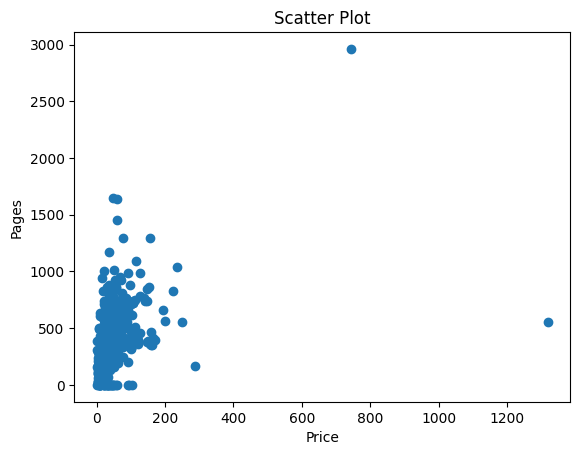

In [42]:
# Convert 'price' column to float
data['price'] = data['price'].astype(float)

# Convert 'pages' column to numeric, replace non-numeric values with 0
data['pages'] = pd.to_numeric(data['pages'], errors='coerce').fillna(0)

# Create scatter plot
plt.scatter(data['price'], data['pages'])
plt.xlabel('Price')
plt.ylabel('Pages')
plt.title('Scatter Plot')

# Display the plot
plt.show()

Plotting the price against the number of pages we can see that there's some positive correlation here so longer books tend to be a bit more expensive which makes total sense because it costs more time and effort to write those books

**BEST PYTHON BOOKS**

Let's try to answer the question of what are the best python books and what are the best machine learning books. We can do this by simple rule based method. we select all the books with the titles containing Python and now let's select the python books with most reviews and have highest average rating. We can do this by using the N largest function. For example if we want to only select the top seven books
and here you can select the columns that we want to use to sort the data. The reason why we want to sort the data on both number of reviews and average reviews is because some books might be not very popular and they have very few review but they are very good reviews so these cases might be more into bias.


In [47]:

from tabulate import tabulate
# Select books based on title containing "Python"
python_books = data[data['title'].str.contains("Python")]
# Convert 'n_reviews' column to numeric
python_books['n_reviews'] = pd.to_numeric(python_books['n_reviews'], errors='coerce')
# Python books with most reviews and highest average rating
best_python_books = python_books.nlargest(7, ['n_reviews','avg_reviews'])
# Display the best Python books as a table
table = tabulate(best_python_books, headers='keys', tablefmt='psql')
print(table)

+-----+------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------+---------+--------------------------------+---------+---------------+-------------+---------+---------+---------+---------+---------+---------------------------+-------------+------------+----------------------------------------------------------+----------------+-------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------+
|     | title                                                                                                                                          | author                               |   price | price (including used books)   |   pages |   avg_reviews |   n_reviews | sta

<ipython-input-47-265d7d208901>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  python_books['n_reviews'] = pd.to_numeric(python_books['n_reviews'], errors='coerce')


**Best Machine Learning Books**

In [50]:
# Select books based on title containing "Machine Learning"
ml_books = data[data['title'].str.contains("Machine Learning")]

# Convert 'n_reviews' column to numeric
ml_books['n_reviews'] = pd.to_numeric(ml_books['n_reviews'], errors='coerce')

# ML books with most reviews and highest average rating
best_ml_books = ml_books.nlargest(7, ['n_reviews', 'avg_reviews'])

# Display the best Machine Learning books as a table
table = tabulate(best_ml_books, headers='keys', tablefmt='psql')
print(table)

+-----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------+---------+--------------------------------+---------+---------------+-------------+---------+---------+---------+---------+---------+--------------------------+-------------+------------+----------------------------------------------------------+----------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|     | title                                                                                               

<ipython-input-50-0f57c4c039fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_books['n_reviews'] = pd.to_numeric(ml_books['n_reviews'], errors='coerce')


Here we printed out the top seven machine learning books. We have some deep learning books. We have the 100 page machine learning book which I didn't really enjoy so much. We have pattern recognition and machine learning which is a very classical book we have a book about reinforcement learning so overall it's quite interesting and informative but I think it really depends on your needs what would be the best books

**LEVEL 2**

**CLUSTERING BOOK TITLES**

Moving on to second level we are doing text clustering with TF IDF and k-means clustering to answer the question what are the main main categories of data science books in this data set and with this approach we can automatically classify the books into different categories without having to go through the 1000 book titles by yourself and come up with the classification rows.

As you may already know clustering is an unsupervised machine learning technique. It is a task of dividing the population or data points into a number of groups such that the data points are more similar to other data points in the same group and disimilar to the data points in other groups. This method is very useful for understanding the structure of the data and there are many many clustering algorithms out there. One might work better than others for particular types of data but for this project we're going to use one of the most simple and popular ones which is k-means.

k-means is an iterative algorithm. You just randomly initialize the centroids or the centers for your clusters and then we simply assign each data points to the nearest centroids. We calculate the mean of the location of all data points that belong to each cluster and then move the location of the centroids to that average location. In rare cases this process may not converge but generally it's a very smart algorithm and I think it works reasonably well in most cases. Now we got this but we have a small problem here in our case we are clustering text data which is a bit more tricky than the usual numeric data so we first need to somehow convert the text into numerical representation that can be used and understood by machine. In a fancy term this is called text vectorization.

People have come up with multiple methods to do this from basic ways such as counting the word frequency in the text and use each unique words as a feature to more advanced methods like word embedding that use shallow neural network on large Text corpus to learn the underlying context of the words. However features in those methods and what they mean are harder to interpret and in recent years we also have large Transformer models that encodes text into huge embedding vectors. We look at one of those models in level 3. For now we use TF IDF which is a popular frequency based vectorization method. It is simple but for sure better than the simple counts vectorizer. Let me take a second to try to explain this technique.

Our aim is to convert the text and in this case the book title into an array of numbers and the array would contain the value for each word that ever appears in one of the book titles. Zero means the word doesn't occur at all in this current title low value means the word exists in a title but is not very important for the overall meaning of the title and the higher value means the word is more important for the overall meaning.

So how does TF IDF determines those values? It does this by multiplying two factors together term frequency and inverse document frequency. The idea is quite simple. The first parameter is a local parameter we calculate the frequency of the word within the document or in this case within the book title. In the book title the best python book for python lovers the word python occurs twice while other words occur only once so python has term frequency of 2 and other words have term frequency of one. Overall we are assuming that python is a more important feature because it occurs more often in this title and the second parameter in this  formula looks more globally. Looking at how rare the word is across all the documents. We measure this by taking the inverse frequency of the words in all the documents. For example if we have another book title named the best R book we can say that the word best is quite popular it appears in both book titles
so you can assume that words like this are probably less important. So multiplying these two terms would give a quite good measure for the importance of the words and it assigns higher value to the more descriptive and informative words and lower value to the unimponent
but maybe more commonly occurring words in the English language. So from scikit learn. Let's import the TF IDF vectorizer.
If you haven't installed scikit learn you may have to do so and then we can initiate the vectorizer object here using the stop words being the English language. Stop words on Words Like You Me
At The with etc those are the words that are generally not interesting for noob tasks. Let's also specify the program range here from one to two because in our book titles we usually see words like date analysis or machine learning or data science etc those are the words that have two words so the program here basically says how many words we want to
put together at time and then we can just use the vectorizer to fit and
transform the title into a vector X.



In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(data["title"])

Here is just basically a huge array that represents each book title. Now to implement K means we also import k-means from scikit learn. A small challenge with k-means is that we have to specify the number of clusters that we want to create. We don't know in advance what
is the optimal number of clusters so we have to find it out ourselves. The strategy is that we'll just assume a minimum number of clusters let's say two clusters and the maximum number of clusters let's say 10 and for each value in those potential number of clusters will perform k-means across string and then we'll calculate the sum of squared
distance or inertial as how it's called in the scikit learn library. It is the sum of squared distance of the data points to their closest cluster Center and I'll just append those sum of squared distance into an array. After we've performed all the clusterings for each possible number of clusters we plot out the sum of squared distance.

In [ ]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [54]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# Kmeans clustering
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=600, n_init=10)
   km.fit(X)
   sum_of_squared_distances.append(km.inertia_)

You can see that the more clusters we have the lower the sum of squared distance is it makes sense right because in extreme case if
we make one cluster for each individual data point then the sum squared distance would be technically zero. With the elbow method we want to find the optimal number of clusters that have the lowest
sum of squared distance.


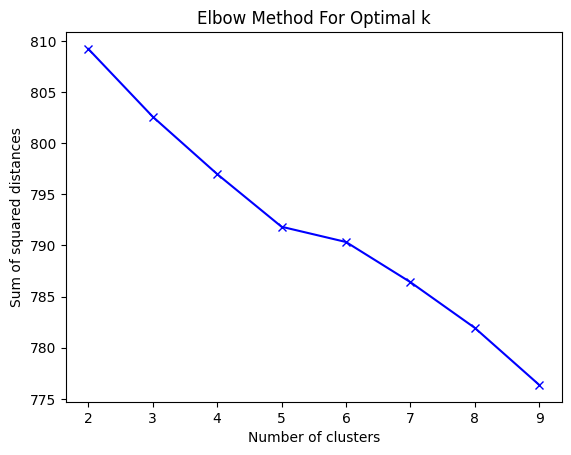

In [55]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see that around cluster 6 the sum Square distance starts declining more slowly so we can expect that 6 is the optimal number of
clusters. However k-means is not deterministic so if you run the code
again you might see a slightly different graph. For now we just choose 6 as the optimal number of clusters and then I'll pass that into the k-means model to get The prediction labels. It's quite simple we just get the labels out of the model and then zip the labels with the title
in the data.



In [56]:
# Get clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
686  Business Intelligence, Analytics, and Data Sci...        0
718    Roman's Data Science: How to monetize your data        0
112  Malware Data Science: Attack Detection and Att...        0
645  Getting Started with Data Science: Making Sens...        0
781    Data Science in Chemistry (De Gruyter Textbook)        0
..                                                 ...      ...
230         Qualitative Data Analysis: An Introduction        5
227  Learning Geospatial Analysis with Python: Unde...        5
226  Multiple Imputation of Missing Data in Practic...        5
251  Humanities Data Analysis: Case Studies with Py...        5
0    Data Analysis Using R (Low Priced Edition): A ...        5

[830 rows x 2 columns]


Here you can see that which cluster the books belong to. Now you might be thinking okay what are those clusters actually mean? That's a
good question. One way to do this is just to print out the top terms per cluster. However it's a little bit less interesting. I prefer to use a more visual way to do this.  We can create a word cloud for each book title cluster. It's very simple.

For each cluster, we obtain the text from all the book titles within that cluster and then we'll create a word cloud out of it.Plot those word clouds together to easily compare them or use subplot to make two rows and three columns because we have in total six clusters. You can see that indeed for each cluster we have different kinds of
topics cluster 2 is all about programming and python, cluster 5 is all
about deep learning python neural network and tensorflow so it's quite interesting to look at those clusters.


In [ ]:
!pip install wordcloud==1.8.2.2

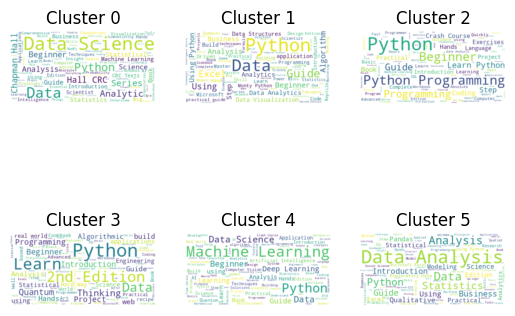

In [58]:
# Create wordclouds for clusters
from wordcloud import WordCloud

for k in range(true_k):
   text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

   # Create subplot
   plt.subplot(2, 3, k+1).set_title("Cluster " + str(k))
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
plt.show()

In [61]:
# Prediction on unseen data
test = vectorizer.transform(['tensorflow Deep learning'])
model.predict(test)[0]

4